In [1]:
import gymnasium as gym
import pandas as pd
import matplotlib.pyplot as plt

from agents import SARSA

<AxesSubplot: >

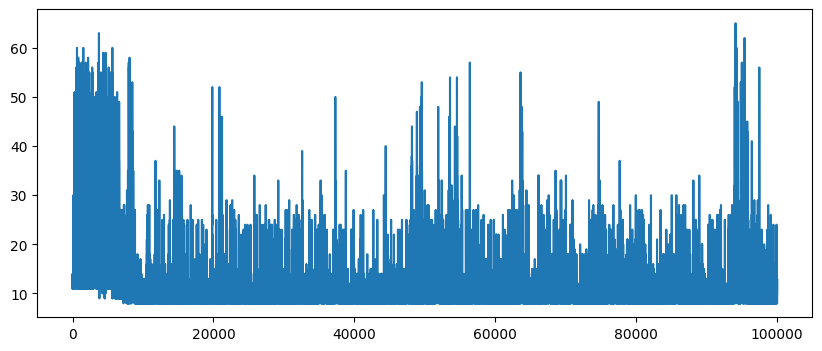

In [2]:
env = gym.make("CartPole-v1")

sarsa = SARSA(env)
sarsa.train(episodes=100000)
sarsa.plot()

In [3]:
sarsa.data.head()

,episode,step,S,A,R
0,0,1,"(1, 1, 2, 5)",0,1.0
1,0,2,"(1, 1, 2, 7)",0,1.0
2,0,3,"(1, 0, 2, 8)",0,1.0
3,0,4,"(1, 0, 3, 9)",0,1.0
4,0,5,"(1, 0, 5, 9)",0,1.0


In [4]:
agents = [SARSA(gym.make("CartPole-v1"), seed=i) for i in range(5)]

df = pd.DataFrame(data={'model':[], 'episode':[], 'step':[], 'S':[], 'A':[], 'R':[]})
for agent in zip(*[agent.step() for agent in agents]):
    for i, (e,step, s, a, r) in enumerate(agent):
        new_row = pd.Series({'model':i, 'episode':e, 'step':step, 'S':s, 'A':a, 'R':r}).to_frame().T
        df = pd.concat([df, new_row], ignore_index=True)

In [5]:
grouped = df[['model', 'episode', 'R']].groupby(['model', 'episode']).sum().reset_index()
grouped = grouped[['episode', 'R']].groupby(['episode']).mean().reset_index()

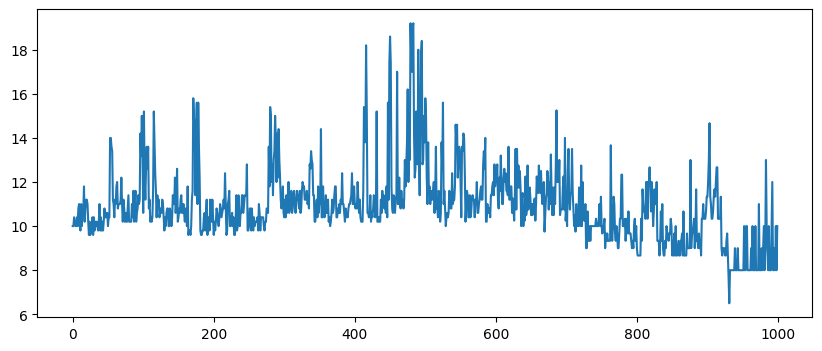

In [6]:
_, axs = plt.subplots(1, 1, figsize=(10, 4))
axs.plot(grouped['R'])